# road obstacle detection


**NOTE:** To make it easier for us to manage datasets, images and models we create a `HOME` constant.

In [11]:
import os
HOME = os.getcwd()
print(HOME)

/content/yolov9


## Clone and Install

In [12]:
!git clone https://github.com/SkalskiP/yolov9.git
%cd yolov9
!pip install -r requirements.txt -q

Cloning into 'yolov9'...
remote: Enumerating objects: 325, done.
remote: Counting objects: 100% (202/202), done.
remote: Compressing objects: 100% (84/84), done.
remote: Total 325 (delta 152), reused 118 (delta 118), pack-reused 123
Receiving objects: 100% (325/325), 2.26 MiB | 15.76 MiB/s, done.
Resolving deltas: 100% (161/161), done.
/content/yolov9/yolov9


In [13]:
!pip install -q roboflow

**NOTE:** In the YOLOv9 paper, versions `yolov9-s` and `yolov9-m` are also mentioned, but the weights for these models are not yet available in the YOLOv9 [repository](https://github.com/WongKinYiu/yolov9).

In [14]:
!wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/yolov9-c.pt
!wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/yolov9-e.pt
!wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/gelan-c.pt
!wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/gelan-e.pt

In [15]:
!ls -la {HOME}/weights

total 402440
drwxr-xr-x  2 root root      4096 Mar 30 14:39 .
drwxr-xr-x 17 root root      4096 Mar 30 14:38 ..
-rw-r--r--  1 root root  51508261 Feb 18 12:36 gelan-c.pt
-rw-r--r--  1 root root 117203713 Feb 18 12:36 gelan-e.pt
-rw-r--r--  1 root root 103153312 Feb 18 12:36 yolov9-c.pt
-rw-r--r--  1 root root 140217688 Feb 18 12:36 yolov9-e.pt


In [6]:
%cd {HOME}/yolov9

[Errno 2] No such file or directory: '{HOME}/yolov9'
/content/yolov9


In [16]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="YAmMvEWx9N2xbqs8tgsA")
project = rf.workspace("sauvc-models").project("road-object-detection-sroot")
version = project.version(1)
dataset = version.download("yolov9")


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to road-object-detection--1 in yolov9:: 100%|██████████| 1528/1528 [00:00<00:00, 2959.53it/s]


In [17]:
%cd {HOME}/yolov9

!python train.py \
--batch 16 --epochs 30 --img 640 --device 0 --min-items 0 --close-mosaic 15 \
--data {dataset.location}/data.yaml \
--weights {HOME}/weights/gelan-c.pt \
--cfg models/detect/gelan-c.yaml \
--hyp hyp.scratch-high.yaml

/content/yolov9/yolov9
2024-03-30 14:39:27.086933: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-30 14:39:27.086997: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-30 14:39:27.089153: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-03-30 14:39:29.763027: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
train: weights=/content/yolov9/weights/gelan-c.pt, cfg=models/detect/gelan-c.yaml, data=/content/yolov9/yolov9/road-object-detection--1/data.yaml, hyp=hyp.scratch-high.yaml, epochs=30, batch_size=16, imgsz=640, rect=Fa

## Examine Training Results

In [18]:
!ls {HOME}/yolov9/runs/train/exp/

confusion_matrix.png				    PR_curve.png	   val_batch0_pred.jpg
events.out.tfevents.1711809571.5dcfe9c6f888.2181.0  R_curve.png		   val_batch1_labels.jpg
F1_curve.png					    results.csv		   val_batch1_pred.jpg
hyp.yaml					    results.png		   val_batch2_labels.jpg
labels_correlogram.jpg				    train_batch0.jpg	   val_batch2_pred.jpg
labels.jpg					    train_batch1.jpg	   weights
opt.yaml					    train_batch2.jpg
P_curve.png					    val_batch0_labels.jpg


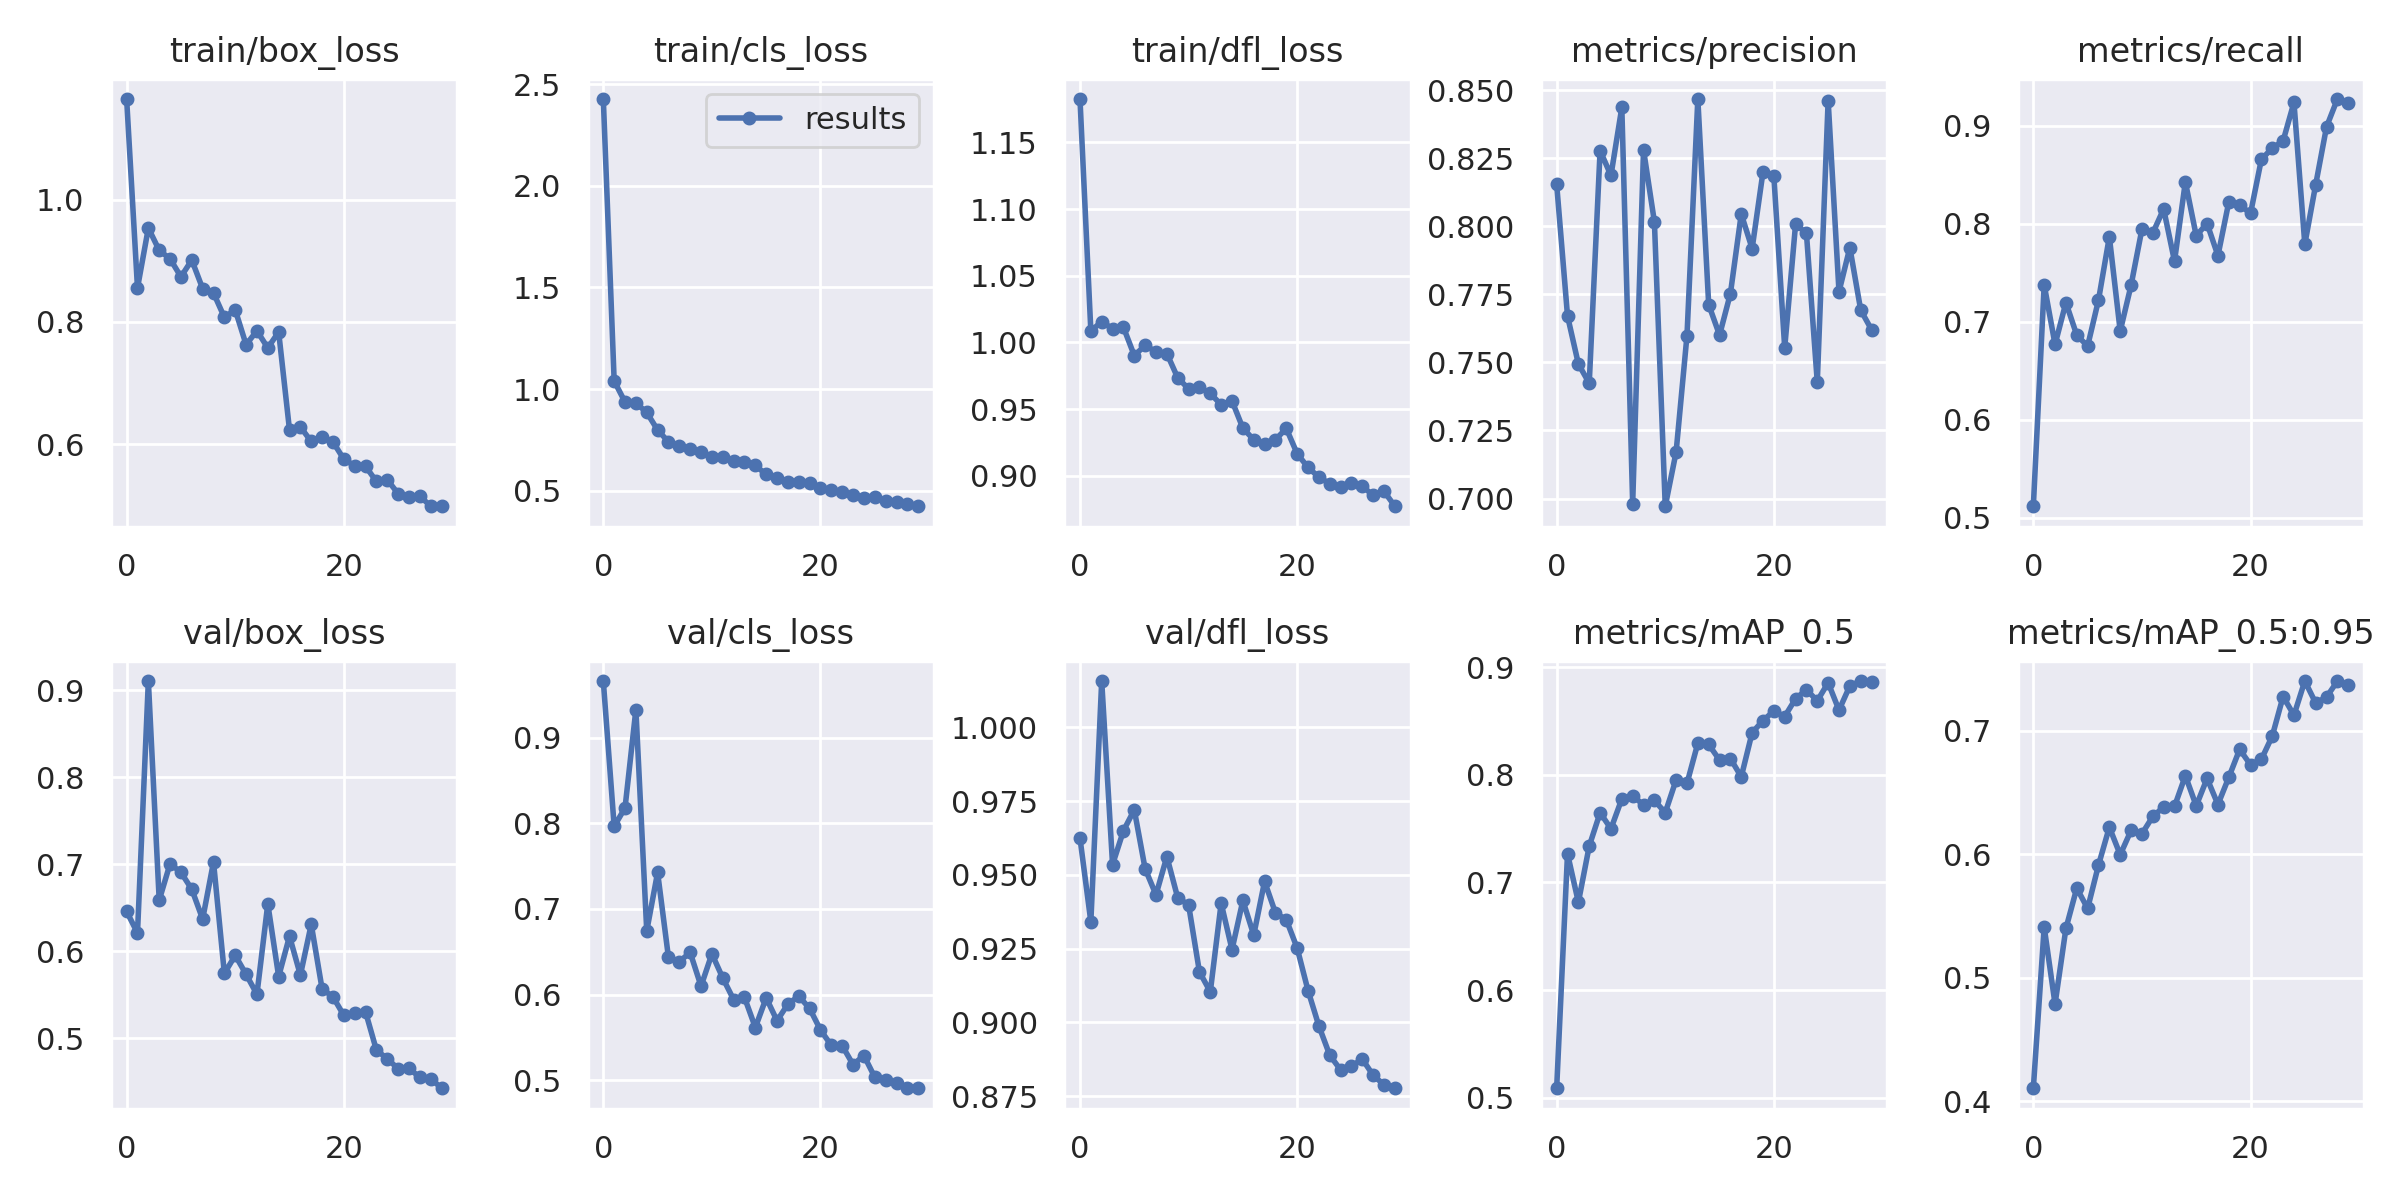

In [19]:
from IPython.display import Image

Image(filename=f"{HOME}/yolov9/runs/train/exp/results.png", width=1000)

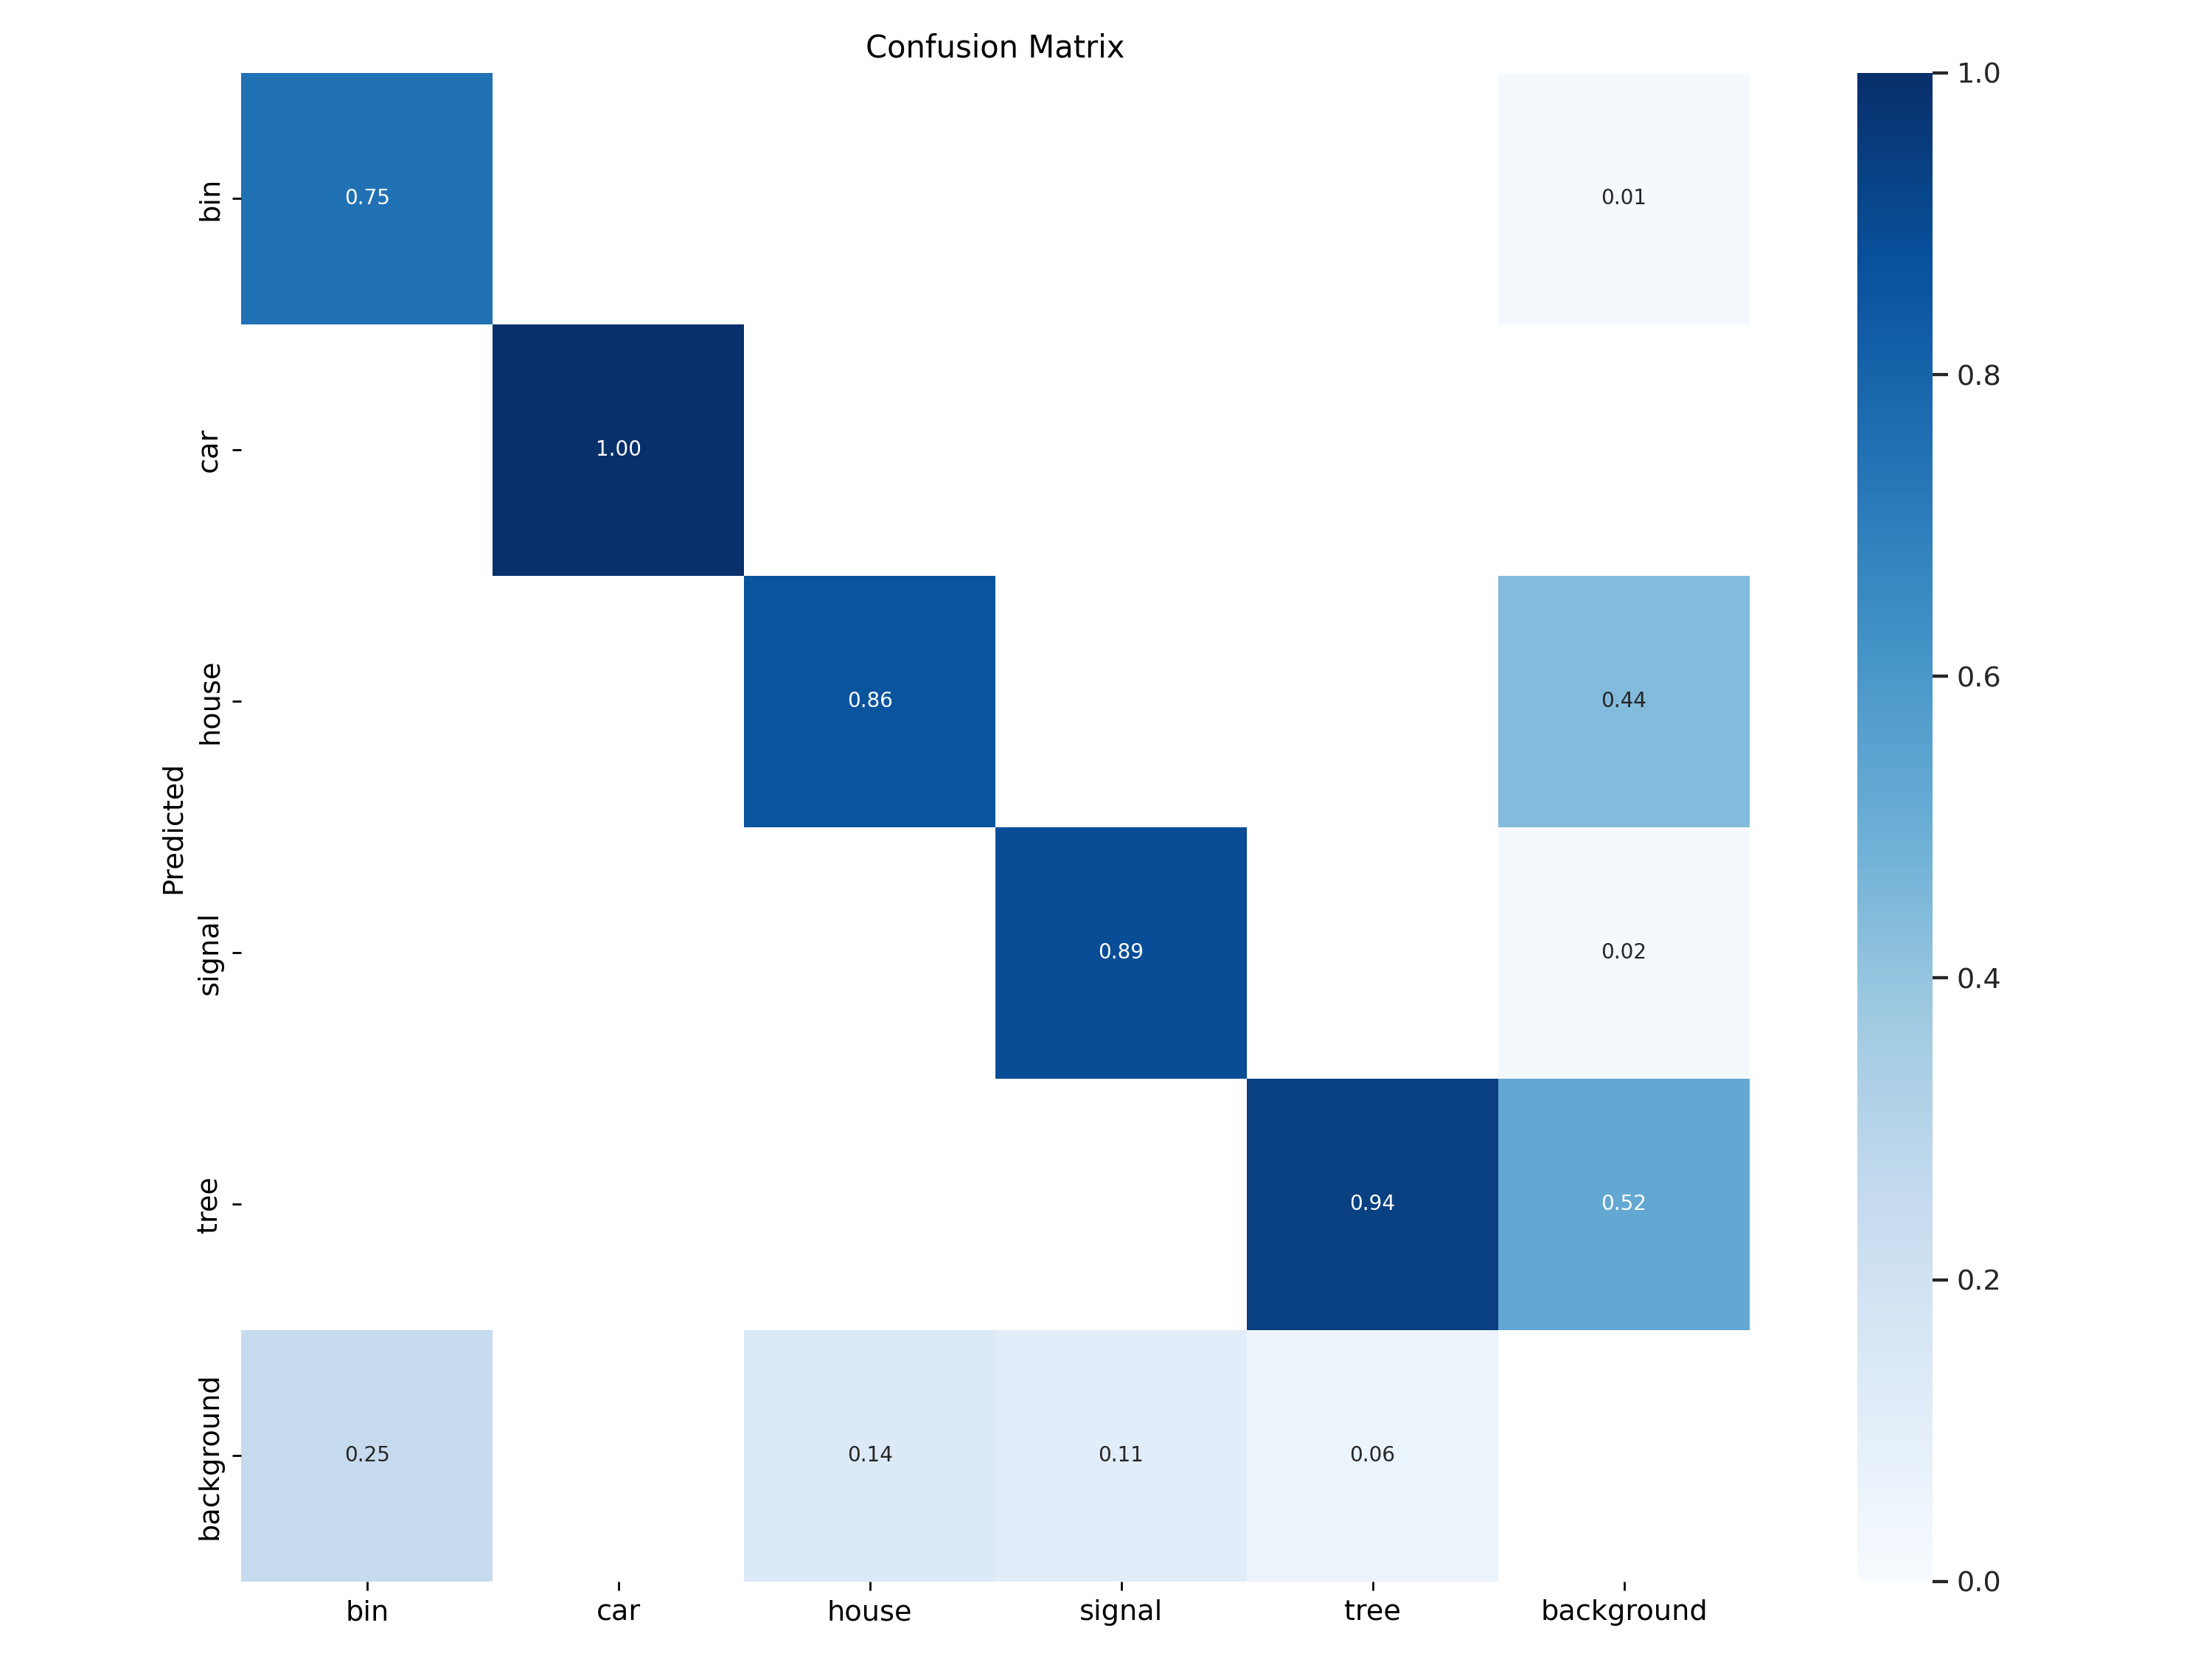

In [20]:
from IPython.display import Image

Image(filename=f"{HOME}/yolov9/runs/train/exp/confusion_matrix.png", width=1000)

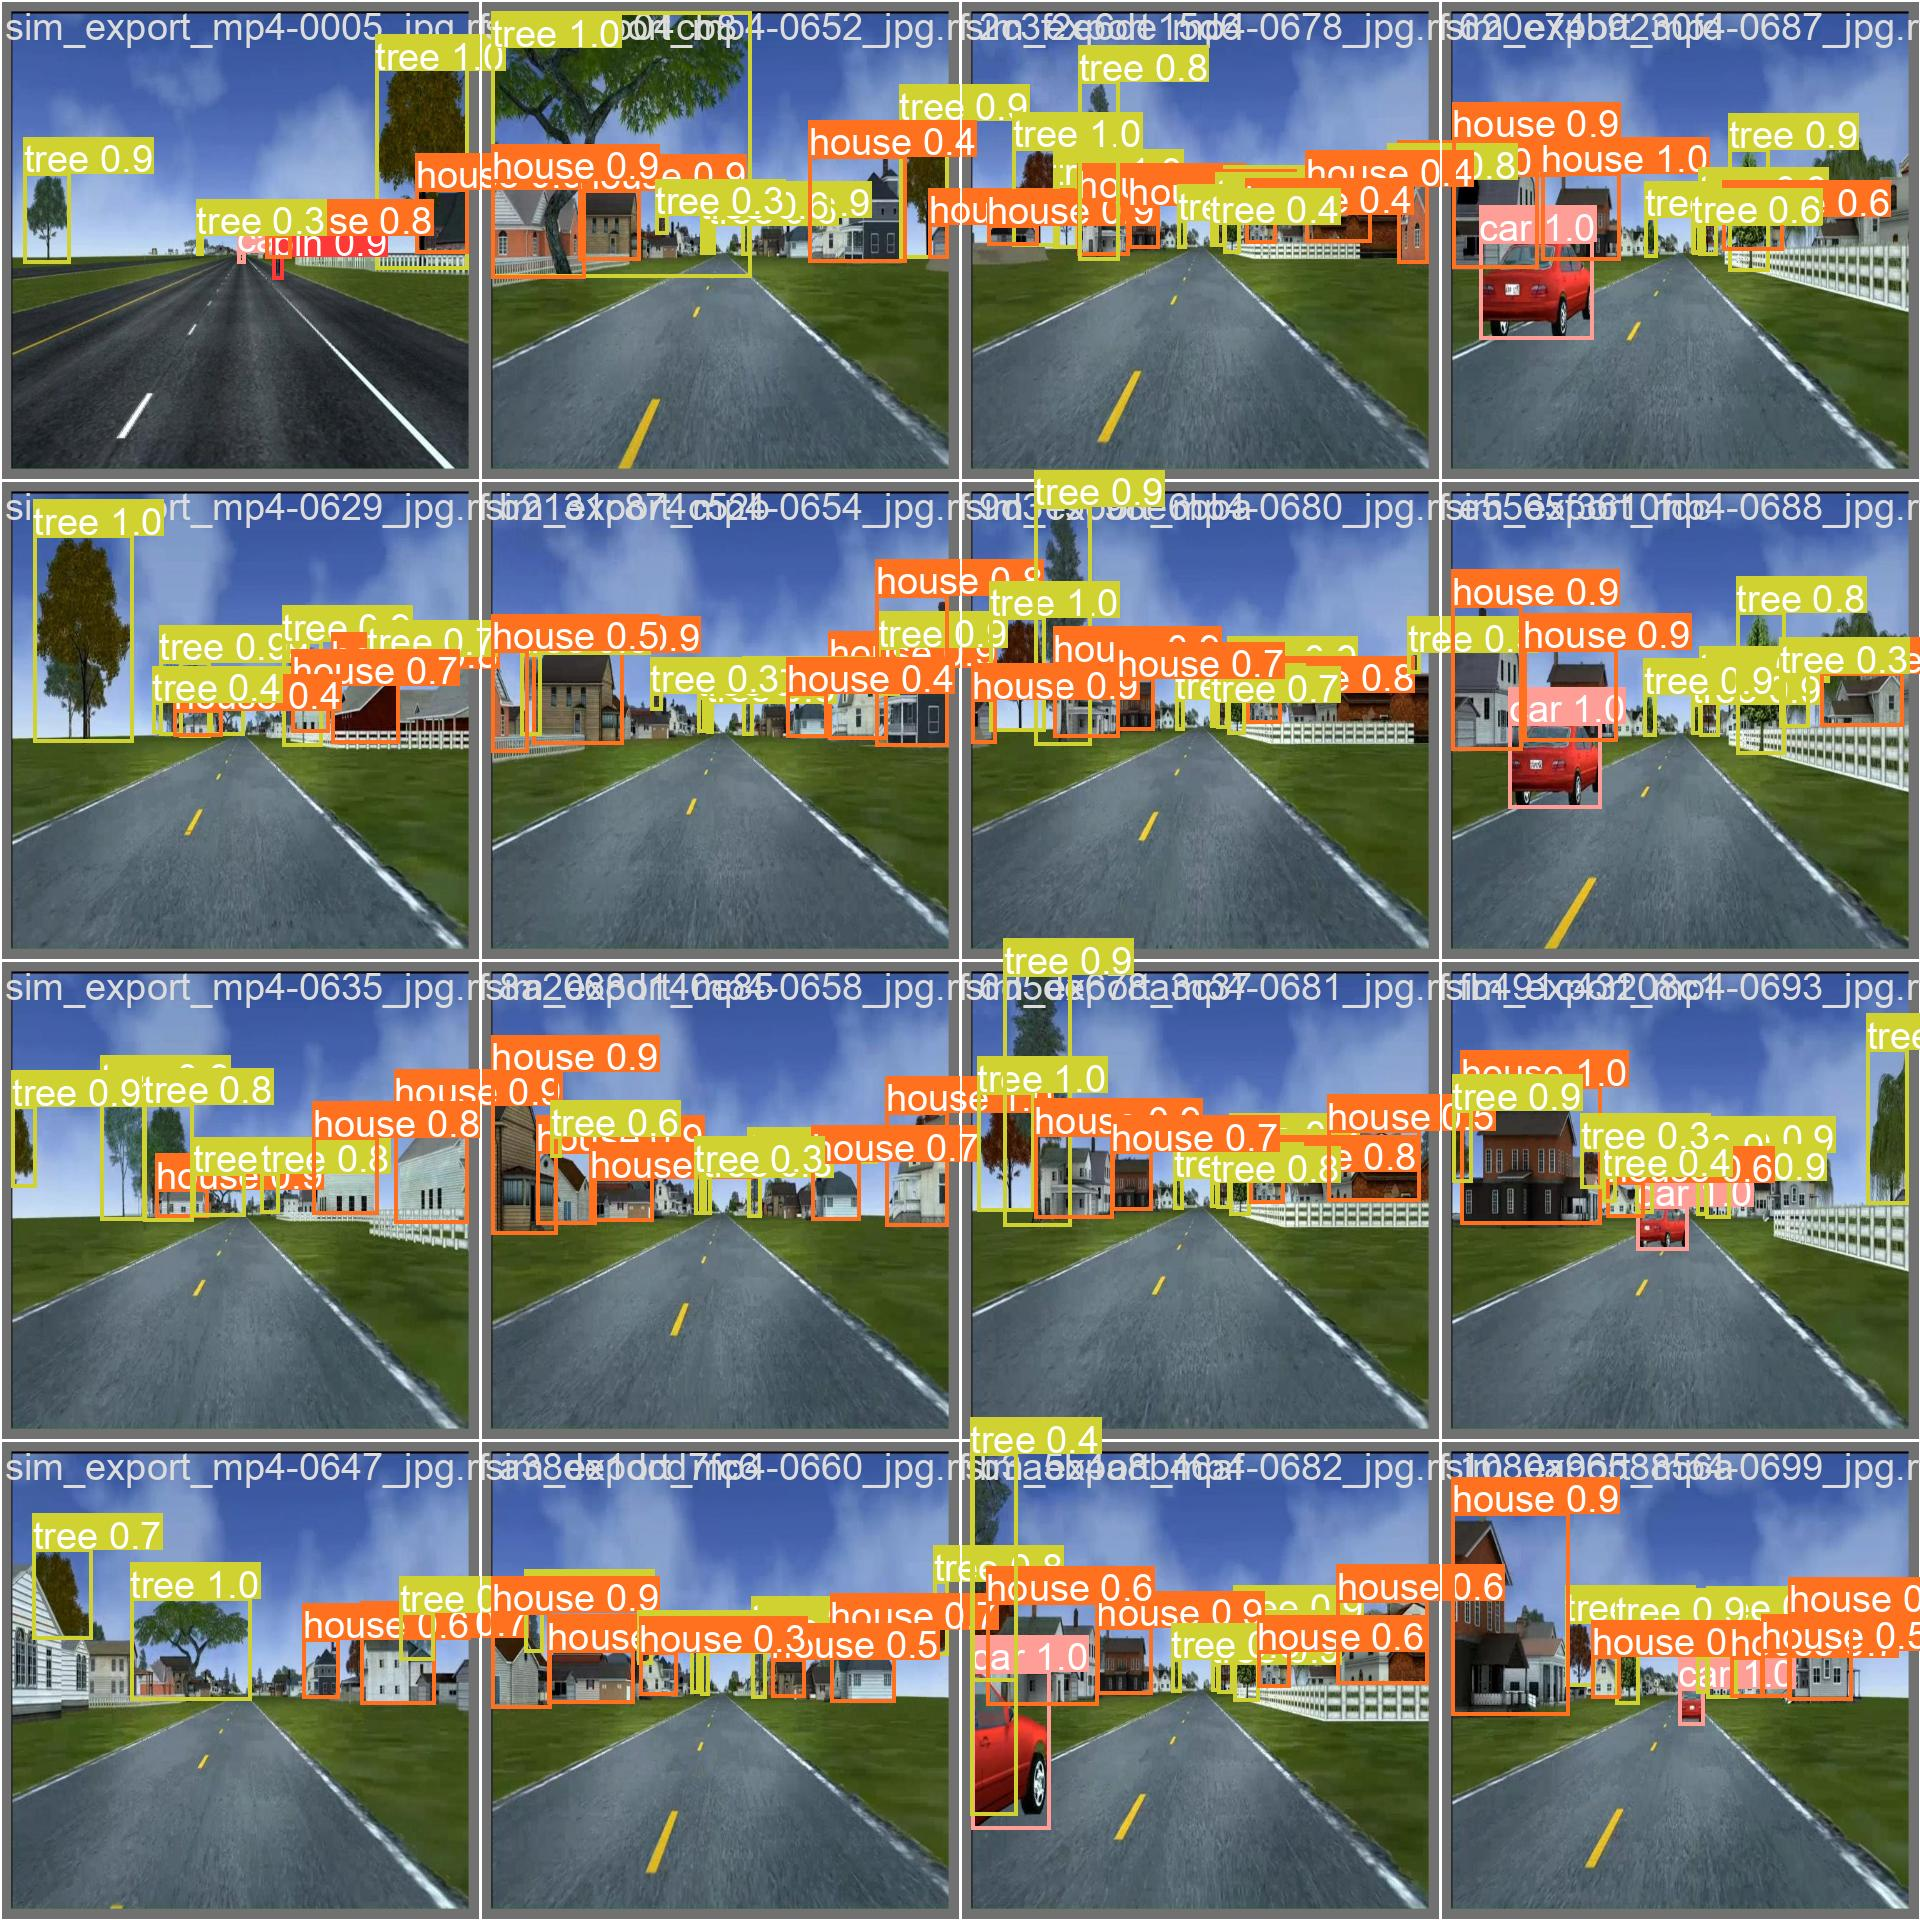

In [21]:
from IPython.display import Image

Image(filename=f"{HOME}/yolov9/runs/train/exp/val_batch0_pred.jpg", width=1000)

## Validate Custom Model

In [22]:
%cd {HOME}/yolov9

!python val.py \
--img 640 --batch 32 --conf 0.001 --iou 0.7 --device 0 \
--data {dataset.location}/data.yaml \
--weights {HOME}/yolov9/runs/train/exp/weights/best.pt

/content/yolov9/yolov9
val: data=/content/yolov9/yolov9/road-object-detection--1/data.yaml, weights=['/content/yolov9/yolov9/runs/train/exp/weights/best.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.7, max_det=300, task=val, device=0, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=False, dnn=False, min_items=0
YOLOv5 🚀 1e33dbb Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
gelan-c summary: 467 layers, 25414815 parameters, 0 gradients, 102.5 GFLOPs
val: Scanning /content/yolov9/yolov9/road-object-detection--1/valid/labels.cache... 151 images, 0 backgrounds, 0 corrupt: 100% 151/151 [00:00<?, ?it/s]
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100% 5/5 [00:12<00:00,  2.59s/it]
                   all        151       1234       0.77      0.927      0.887      0.743
    

## Inference with Custom Model

In [23]:
!python detect.py \
--img 1280 --conf 0.1 --device 0 \
--weights {HOME}/yolov9/runs/train/exp/weights/best.pt \
--source {dataset.location}/test/images

detect: weights=['/content/yolov9/yolov9/runs/train/exp/weights/best.pt'], source=/content/yolov9/yolov9/road-object-detection--1/test/images, data=data/coco128.yaml, imgsz=[1280, 1280], conf_thres=0.1, iou_thres=0.45, max_det=1000, device=0, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 1e33dbb Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
gelan-c summary: 467 layers, 25414815 parameters, 0 gradients, 102.5 GFLOPs
image 1/76 /content/yolov9/yolov9/road-object-detection--1/test/images/sim_export_mp4-0009_jpg.rf.15bf191fc8f495dd95836373d0f7cf09.jpg: 1280x1280 1 bin, 1 car, 1 house, 2 trees, 109.1ms
image 2/76 /content/yolov9/yolov9/road-object-detection--1/test/images/sim_export_mp4-0037_jpg.rf.24b

**NOTE:** Just like behore, the inference results have been saved in the appropriate directory inside `{HOME}/yolov9/runs/detect/`. Let's examine few of those results.

In [24]:
import glob

from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/yolov9/runs/detect/exp3/*.jpg')[:2]:
      display(Image(filename=image_path, width=600))

In [25]:
!pip install -q inference supervision

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.5/345.5 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.1/97.1 kB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.2/59.2 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 25.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.1/92.1 kB 12.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 251.8/251.8 kB 28.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 239.7/239.7 kB 28.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 83.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.0/66.0 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 262.9/262.9 kB 28.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.7/65.7 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 940.0/940.0 kB 69.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━

In [26]:
import cv2
import random
import getpass

import supervision as sv

from inference import get_model

%matplotlib inline

SupervisionWarnings: BoxAnnotator is deprecated: `BoxAnnotator` is deprecated and will be removed in `supervision-0.22.0`. Use `BoundingBoxAnnotator` and `LabelAnnotator` instead


In [27]:
version.deploy(model_type="yolov9", model_path=f"{HOME}/yolov9/runs/train/exp")

View the status of your deployment at: https://app.roboflow.com/sauvc-models/road-object-detection-sroot/1
Share your model with the world at: https://universe.roboflow.com/sauvc-models/road-object-detection-sroot/model/1
